In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('data (2).csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_2460\3522888587.py:12: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\PC\AppData\Local\Temp\ipykernel_2460\3522888587.py:12: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


Accelerated Gradient Descent converged in 1608688 iterations.


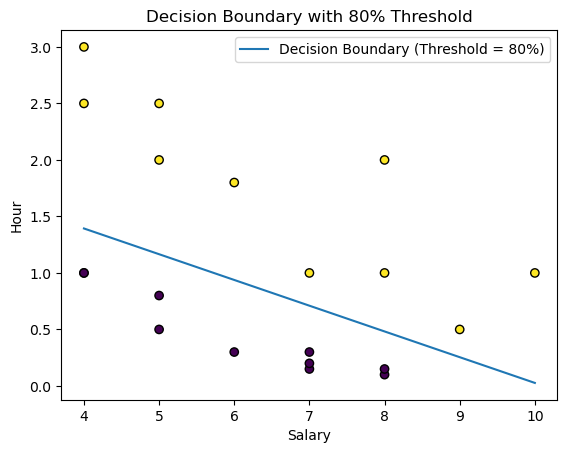

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the cost function
def compute_cost(X, y, w):
    m = len(y)
    h = sigmoid(X @ w)
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Compute the gradient
def compute_gradient(X, y, w):
    m = len(y)
    h = sigmoid(X @ w)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient

# Accelerated Gradient Descent algorithm
def accelerated_gradient_descent(X, y, w, learning_rate, num_iterations, beta):
    cost_history = []
    w_prev = np.zeros_like(w)
    
    for i in range(num_iterations):
        gradient = compute_gradient(X, y, w)
        w_new = w - learning_rate * gradient + beta * (w - w_prev)
        w_prev = w
        w = w_new
        cost = compute_cost(X, y, w)
        cost_history.append(cost)
        if np.linalg.norm(gradient, 2) < 1e-6:
            print(f'Accelerated Gradient Descent converged in {i} iterations.')
            break
    else:
        print(f'Accelerated Gradient Descent did not converge after {num_iterations} iterations.')
    
    return w, cost_history

# Prepare the data
X = data[['salary', 'hour']].values
y = data['cho vay'].values
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones for the bias term

# Initialize weights
w = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.5
num_iterations = 20000000
beta = 0.9  # Momentum term

# Run accelerated gradient descent
w, cost_history = accelerated_gradient_descent(X, y, w, learning_rate, num_iterations, beta)

# Calculate loan approval probability for a new record
def predict_probability(salary, hour, w):
    x = np.array([1, salary, hour])
    return sigmoid(np.dot(x, w))

# Plot the decision boundary with an 80% threshold
def plot_decision_boundary(X, y, w, threshold=0.8):
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolors='k')
    
    x_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    log_odds = np.log(threshold / (1 - threshold))
    y_values = -(w[0] + w[1] * x_values - log_odds) / w[2]
    
    plt.plot(x_values, y_values, label=f'Decision Boundary (Threshold = {threshold*100:.0f}%)')
    plt.xlabel('Salary')
    plt.ylabel('Hour')
    plt.legend()
    plt.title('Decision Boundary with 80% Threshold')
    plt.show()

# Plot the decision boundary for an 80% threshold
plot_decision_boundary(X, y, w, threshold=0.8)



In [4]:
salary_new = 9
hour_new = 0.5
probability_new = predict_probability(salary_new, hour_new, w)
print(f'xác suất mà chúng ta dự đoán hồ sơ được cho vay với mức lương {salary_new} triệu và kinh nghiệm làm việc {hour_new} năm: {probability_new:.2f}')
print(f'Quyết định cho vay: {"Được cho vay" if probability_new >= 0.8 else "Không được cho vay"}')

xác suất mà chúng ta dự đoán hồ sơ được cho vay với mức lương 9 triệu và kinh nghiệm làm việc 0.5 năm: 1.00
Quyết định cho vay: Được cho vay
